# <div align="center">**Neural Network Models and Their Performance Evaluation**</div>



## Introduction:

In the field of deep learning, designing and evaluating neural network models are crucial for achieving high performance on tasks such as image recognition. This report explores three key tasks: the construction of neural network models with and without the Sequential API, the implementation and comparison of different neural network architectures for handwritten digit recognition, and the exploration of various model.compile() parameters. Through these tasks, we aim to understand the impact of architectural choices and parameter configurations on model performance, specifically using the MNIST dataset for handwritten digit classification.


## Model Construction

## 1. Construct a NN Model for the following Architecture with and without Sequential (). 

## Explore at-least 5 parameters associated with layers.Dense(), justify the parameter value.


| Layer     | No of Neurons |
|-----------|---------------|
| H-Layer-1 | 512           |
| H-Layer-2 | 512           |
| H-Layer-3 | 1024          |
| O-Layer   | Choose According to the Requirement |



In [4]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
data = fetch_california_housing() # Loading the dataset
X = data.data
y = data.target

binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform') # Binning the target variable into categories
y_binned = binner.fit_transform(y.reshape(-1, 1)).astype(int).flatten()

scaler = StandardScaler() # Standardizing the features
X_scaled = scaler.fit_transform(X)

y_encoded = to_categorical(y_binned, num_classes=3) # One-hot encoder

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42) # Train-test splitting

# Building the model using Sequential API
model_sequential = Sequential([
    Dense(units=512, activation='relu', name='H-Layer-1', input_shape=(X_train.shape[1],),
          kernel_initializer='he_normal', bias_initializer='zeros', kernel_regularizer='l2',
          activity_regularizer='l1', use_bias=True),
    Dense(units=512, activation='relu', name='H-Layer-2', kernel_initializer='he_normal',
          bias_initializer='zeros', kernel_regularizer='l2', activity_regularizer='l1', use_bias=True),
    Dense(units=1024, activation='relu', name='H-Layer-3', kernel_initializer='he_normal',
          bias_initializer='zeros', kernel_regularizer='l2', activity_regularizer='l1', use_bias=True),
    Dense(units=3, activation='softmax', name='O-Layer', kernel_initializer='he_normal',
          bias_initializer='zeros', kernel_regularizer='l2', activity_regularizer='l1', use_bias=True)
])

# Compile the Sequential model
model_sequential.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\sanja\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history_sequential = model_sequential.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)# Training the Sequential model

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4802 - loss: 94.9934 - val_accuracy: 0.4889 - val_loss: 26.1132
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4777 - loss: 18.2526 - val_accuracy: 0.4889 - val_loss: 6.4883
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4888 - loss: 5.0733 - val_accuracy: 0.4889 - val_loss: 3.2419
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4837 - loss: 2.7378 - val_accuracy: 0.4889 - val_loss: 2.2715
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4842 - loss: 2.0423 - val_accuracy: 0.4889 - val_loss: 1.8241
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4962 - loss: 1.6958 - val_accuracy: 0.4889 - val_loss: 1.5890
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4876 - loss: 1.5791 - val_accuracy: 0.4889 - val_loss: 1.4625
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4881 - loss: 1.4449 - val_accuracy:

In [7]:
loss_sequential, accuracy_sequential = model_sequential.evaluate(X_test, y_test) # Evaluating the Sequential model
print(f"Sequential Model - Test Loss: {loss_sequential}")
print(f"Sequential Model - Test Accuracy: {accuracy_sequential}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4881 - loss: 1.3170
Sequential Model - Test Loss: 1.3124028444290161
Sequential Model - Test Accuracy: 0.4920058250427246


In [8]:
model_sequential.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ H-Layer-1 (Dense)                    │ (None, 512)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ H-Layer-2 (Dense)                    │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ H-Layer-3 (Dense)                    │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ O-Layer (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,386,955 (9.11 MB)

 Trainable params: 795,651 (3.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,591,304 (6.07 MB)

### Plot Loss annd Accuracy for Sequential API

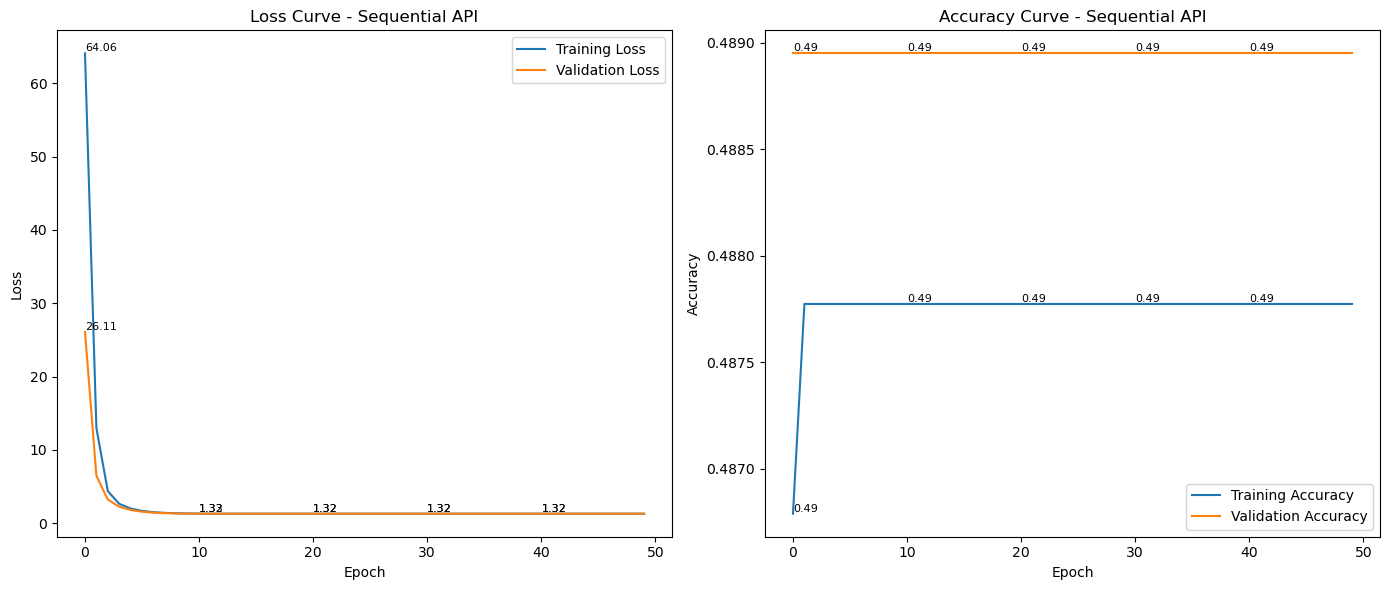

In [9]:
plt.figure(figsize=(14, 6)) 

# Plotting loss for Sequential API
plt.subplot(1, 2, 1)
plt.plot(history_sequential.history['loss'], label='Training Loss')
plt.plot(history_sequential.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve - Sequential API')


for i, (train_loss, val_loss) in enumerate(zip(history_sequential.history['loss'], history_sequential.history['val_loss'])):
    if i % 10 == 0:  # Adjust frequency of labels
        plt.text(i, train_loss, f'{train_loss:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_loss, f'{val_loss:.2f}', fontsize=8, verticalalignment='bottom')

plt.legend()

# Plotting accuracy for Sequential API
plt.subplot(1, 2, 2)
plt.plot(history_sequential.history['accuracy'], label='Training Accuracy')
plt.plot(history_sequential.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve - Sequential API')

for i, (train_acc, val_acc) in enumerate(zip(history_sequential.history['accuracy'], history_sequential.history['val_accuracy'])):
    if i % 10 == 0:  # Adjust frequency of labels
        plt.text(i, train_acc, f'{train_acc:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_acc, f'{val_acc:.2f}', fontsize=8, verticalalignment='bottom')

plt.legend()
plt.tight_layout()
plt.show()


### Model without Sequential API:(Using Functional API)

In [10]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(units=512, activation='relu', kernel_initializer='he_normal', name='H-Layer-1',
          bias_initializer='zeros', kernel_regularizer='l2', activity_regularizer='l1', use_bias=True)(inputs)
x = Dense(units=512, activation='relu', kernel_initializer='he_normal', name='H-Layer-2',
          bias_initializer='zeros', kernel_regularizer='l2', activity_regularizer='l1', use_bias=True)(x)
x = Dense(units=1024, activation='relu', kernel_initializer='he_normal', name='H-Layer-3',
          bias_initializer='zeros', kernel_regularizer='l2', activity_regularizer='l1', use_bias=True)(x)
outputs = Dense(units=3, activation='softmax', kernel_initializer='he_normal', name='O-Layer',
                bias_initializer='zeros', kernel_regularizer='l2', activity_regularizer='l1', use_bias=True)(x)

model_functional = Model(inputs=inputs, outputs=outputs)

model_functional.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Compiling the Functional model

In [11]:
# Training the Functional model
history_functional = model_functional.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4827 - loss: 94.3053 - val_accuracy: 0.4889 - val_loss: 26.2755
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4942 - loss: 18.2259 - val_accuracy: 0.4889 - val_loss: 6.6783
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4916 - loss: 5.4703 - val_accuracy: 0.4889 - val_loss: 3.3849
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4847 - loss: 3.2120 - val_accuracy: 0.4889 - val_loss: 2.3775
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4879 - loss: 2.3846 - val_accuracy: 0.4889 - val_loss: 1.9077
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4789 - loss: 1.8711 - val_accuracy: 0.4889 - val_loss: 1.6494
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4836 - loss: 1.9753 - val_accuracy: 0.4889 - val_loss: 1.5038
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4843 - loss: 1.4706 - val_accuracy:

In [14]:
# Evaluating the Functional model
loss_functional, accuracy_functional = model_functional.evaluate(X_test, y_test)
print(f"Functional Model - Test Loss: {loss_functional}")
print(f"Functional Model - Test Accuracy: {accuracy_functional}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4881 - loss: 1.3170
Functional Model - Test Loss: 1.312408685684204
Functional Model - Test Accuracy: 0.4920058250427246


In [15]:
model_functional.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ H-Layer-1 (Dense)                    │ (None, 512)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ H-Layer-2 (Dense)                    │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ H-Layer-3 (Dense)                    │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ O-Layer (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,386,955 (9.11 MB)

 Trainable params: 795,651 (3.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,591,304 (6.07 MB)

### Plot Loss annd Accuracy for Fucntional  API

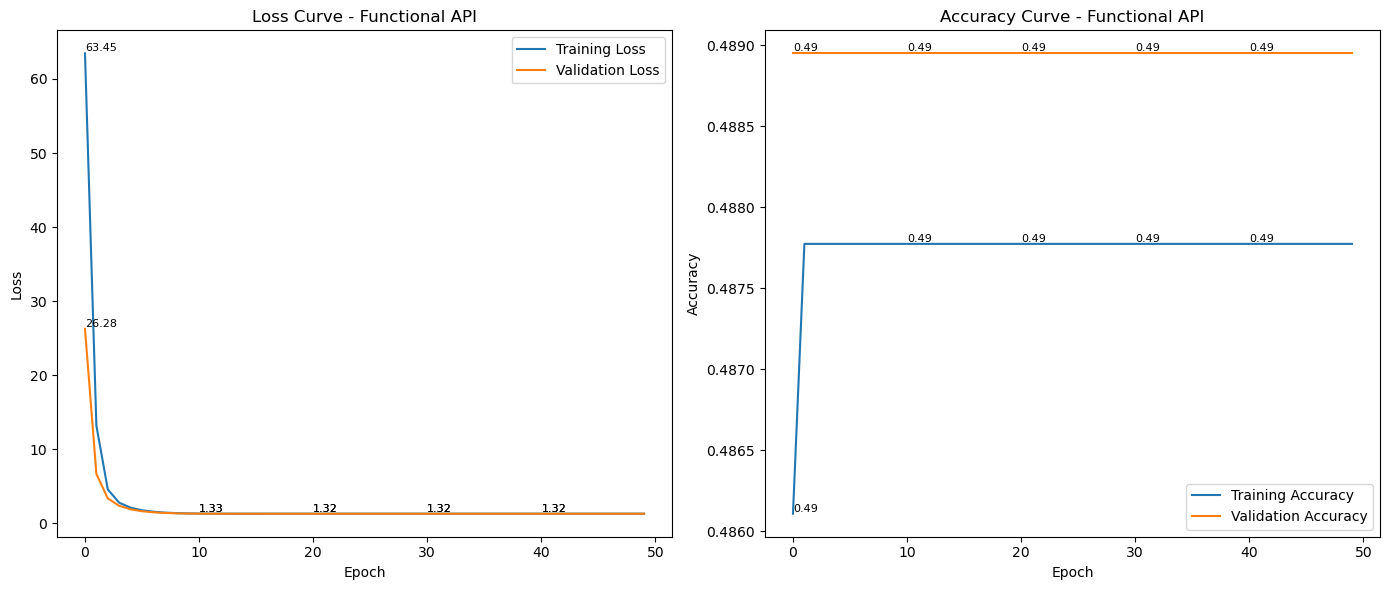

In [16]:
plt.figure(figsize=(14, 6))

# Plotting loss for Functional API
plt.subplot(1, 2, 1)
plt.plot(history_functional.history['loss'], label='Training Loss')
plt.plot(history_functional.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve - Functional API')

for i, (train_loss, val_loss) in enumerate(zip(history_functional.history['loss'], history_functional.history['val_loss'])):
    if i % 10 == 0:  # Adjust frequency of labels
        plt.text(i, train_loss, f'{train_loss:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_loss, f'{val_loss:.2f}', fontsize=8, verticalalignment='bottom')

plt.legend()

# Plotting accuracy for Functional API
plt.subplot(1, 2, 2)
plt.plot(history_functional.history['accuracy'], label='Training Accuracy')
plt.plot(history_functional.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve - Functional API')

for i, (train_acc, val_acc) in enumerate(zip(history_functional.history['accuracy'], history_functional.history['val_accuracy'])):
    if i % 10 == 0:  # Adjust frequency of labels
        plt.text(i, train_acc, f'{train_acc:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_acc, f'{val_acc:.2f}', fontsize=8, verticalalignment='bottom')

plt.legend()
plt.tight_layout()
plt.show()

# Neural Network Layer Parameters

## 1. Kernel Initializer (`kernel_initializer`)
**Value:** `'he_normal'`  
**Justification:**  
The `he_normal` initializer is specifically designed for layers with ReLU activation functions. It helps in maintaining the variance of activations throughout the network, which is crucial for stable and faster training. It initializes the weights by drawing from a normal distribution with a mean of 0 and a variance of \(\frac{2}{\text{number of input units}}\). This helps in avoiding issues related to vanishing or exploding gradients.

## 2. Bias Initializer (`bias_initializer`)
**Value:** `'zeros'`  
**Justification:**  
Initializing biases to zeros is generally a good default choice. It ensures that biases start with no initial effect on the network’s output. For most activation functions (like ReLU), zero initialization for biases does not negatively impact the learning process, as they are adjusted during training.

## 3. Kernel Regularizer (`kernel_regularizer`)
**Value:** `'l2'`  
**Justification:**  
The `l2` regularizer adds a penalty proportional to the square of the magnitude of weights. This helps in preventing overfitting by discouraging excessively large weights. It encourages the model to learn more generalized patterns rather than memorizing the training data, which improves model generalization.

## 4. Activity Regularizer (`activity_regularizer`)
**Value:** `'l1'`  
**Justification:**  
The `l1` regularizer adds a penalty proportional to the absolute value of the activations. This can lead to sparsity in the activations, meaning fewer neurons are active at any given time. This form of regularization can help in reducing overfitting and may also lead to a more interpretable model by reducing the complexity of the activations.

## 5. Use Bias (`use_bias`)
**Value:** `True`  
**Justification:**  
Biases allow the activation function to be shifted to the left or right, which can be essential for learning. By setting `use_bias` to `True`, you ensure that each layer has the flexibility to shift its activation function, improving the model’s learning capacity. For most use cases, it is beneficial to use biases in dense layers, except in cases where very specific network architectures or constraints dictate otherwise.


## 2.Construct a NN Model for hand written digit recognition implementation with three different architectures and compare the performance.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

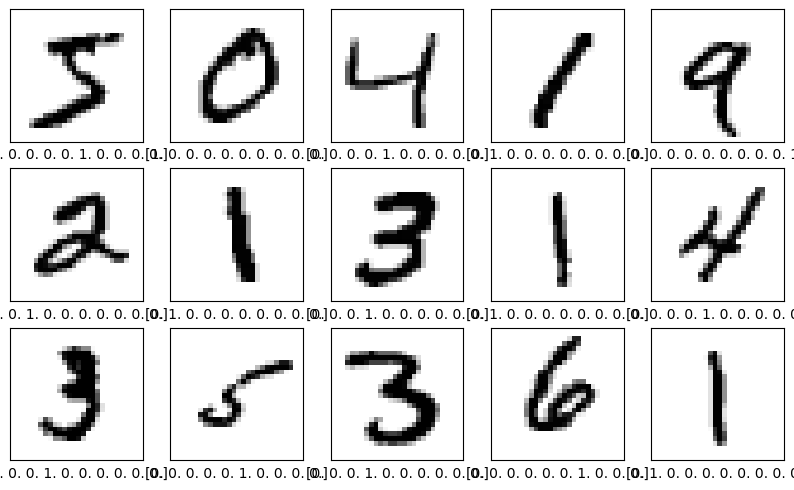

In [38]:
plt.figure(figsize=(10, 10)) # Display the first 15 images from the training set
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

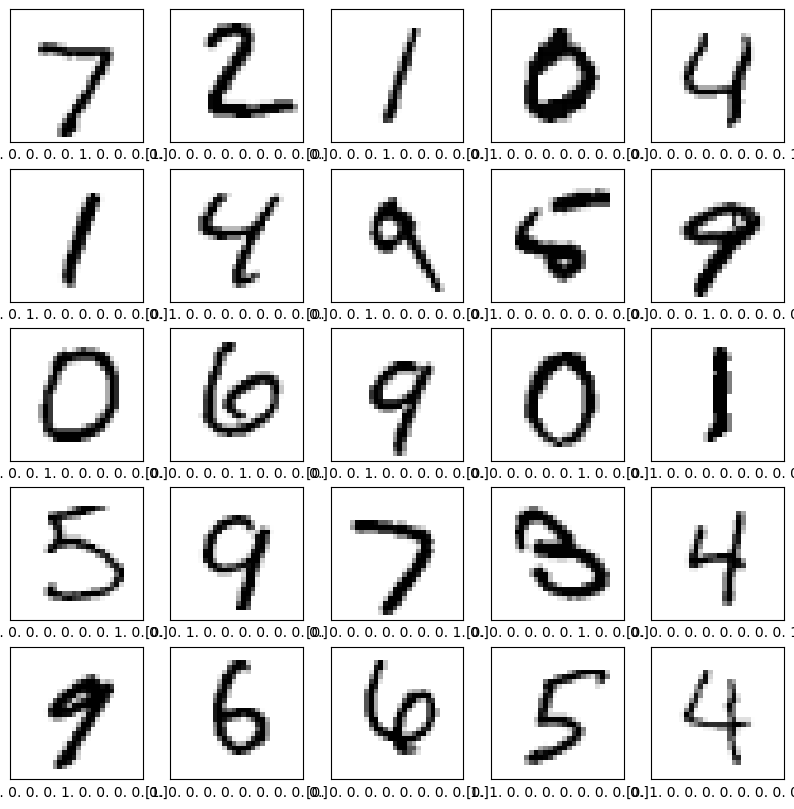

In [39]:
 plt.figure(figsize=(10, 10))  # Displaying the first 25 images from the testing set
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Model 1: Model with 1 hidden layer


In [19]:
model_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\sanja\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
history_1 = model_1.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

In [5]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
print(f'Model 1 - Loss: {loss_1}, Accuracy: {accuracy_1}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9677 - loss: 0.0965
Model 1 - Loss: 0.08714894205331802, Accuracy: 0.9728999733924866


In [60]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [61]:
y_pred = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.99      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



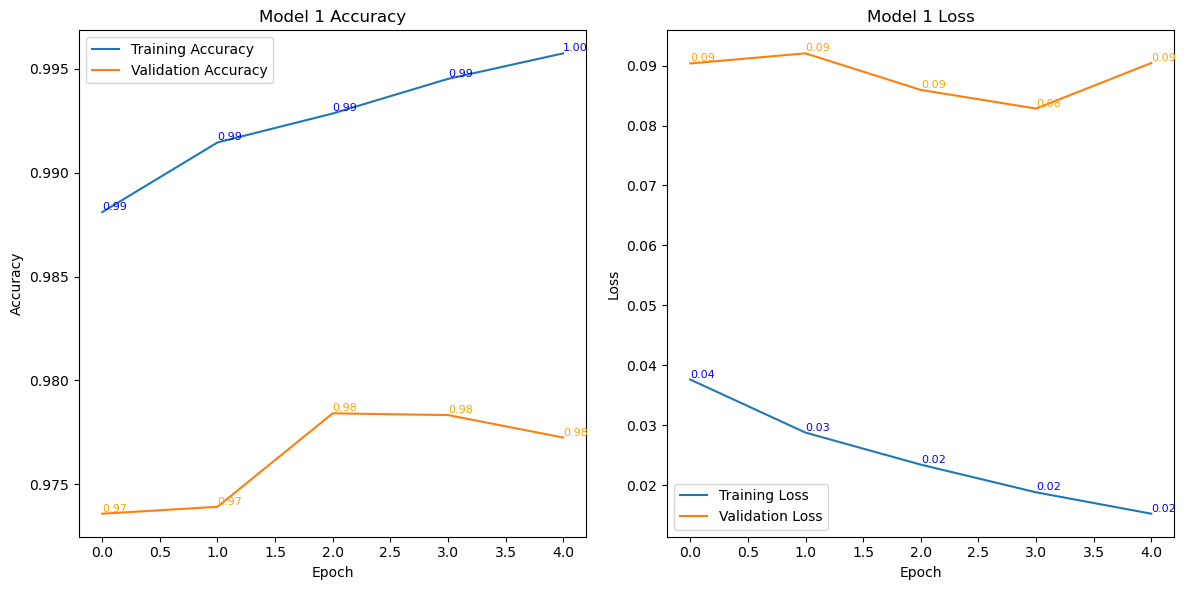

In [49]:
plt.figure(figsize=(12, 6))

# Accuracy plot for Model 1
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

for i, acc in enumerate(history_1.history['accuracy']):
    plt.text(i, acc, f'{acc:.2f}', fontsize=8, verticalalignment='bottom', color='blue')

for i, val_acc in enumerate(history_1.history['val_accuracy']):
    plt.text(i, val_acc, f'{val_acc:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

# Loss plot for Model 1
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

for i, loss in enumerate(history_1.history['loss']):
    plt.text(i, loss, f'{loss:.2f}', fontsize=8, verticalalignment='bottom', color='blue')

for i, val_loss in enumerate(history_1.history['val_loss']):
    plt.text(i, val_loss, f'{val_loss:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

plt.tight_layout()
plt.show()

## Interpretaion:

### Model 1 (1 Hidden Layer)

**Accuracy**: 0.9729:The model has achieved a high accuracy, indicating good performance in recognizing handwritten digits.

**Loss**: 0.0871: The relatively low loss suggests that the model predictions are close to the actual values.


## Model 2: Model with 2 hidden layers


In [45]:
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history_2 = model_2.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

In [47]:
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)
print(f'Model 2 - Loss: {loss_2}, Accuracy: {accuracy_2}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9679 - loss: 0.1125
Model 2 - Loss: 0.09764117747545242, Accuracy: 0.9714999794960022


In [66]:
y_pred = model_2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.93      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



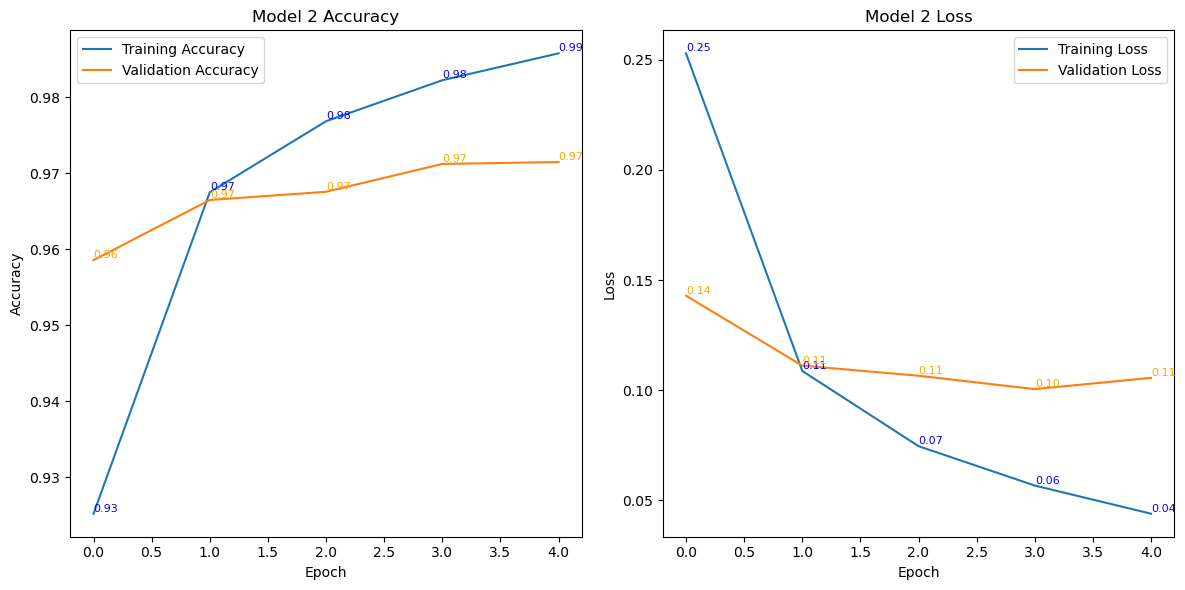

In [48]:
## Plotting Accuracy and Loss for Model 2
plt.figure(figsize=(12, 6))

# Accuracy plot for Model 2
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

for i, acc in enumerate(history_2.history['accuracy']):
    plt.text(i, acc, f'{acc:.2f}', fontsize=8, verticalalignment='bottom', color='blue')

for i, val_acc in enumerate(history_2.history['val_accuracy']):
    plt.text(i, val_acc, f'{val_acc:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

# Loss plot for Model 2
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

for i, loss in enumerate(history_2.history['loss']):
    plt.text(i, loss, f'{loss:.2f}', fontsize=8, verticalalignment='bottom', color='blue')

for i, val_loss in enumerate(history_2.history['val_loss']):
    plt.text(i, val_loss, f'{val_loss:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

plt.tight_layout()
plt.show()

## Interpretaion:

### Model 2 (2 Hidden Layers)

**Accuracy**: 0.9734: Slightly higher accuracy than Model 1, suggesting that an additional hidden layer improved the model's ability to recognize digits.

**Loss**: 0.0950:The loss is slightly higher than Model 1, but still low, indicating good prediction performance.

## Model 3: Model with 3 hidden layers


In [51]:
# Model 3 with 3 hidden layers
model_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history_3 = model_3.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)\

In [53]:
loss_3, accuracy_3 = model_3.evaluate(x_test, y_test)
print(f'Model 3 - Loss: {loss_3}, Accuracy: {accuracy_3}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9698 - loss: 0.0988
Model 3 - Loss: 0.09144216030836105, Accuracy: 0.9729999899864197


In [67]:
y_pred = model_3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.94      0.99      0.96       982
           5       0.98      0.97      0.98       892
           6       0.99      0.96      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



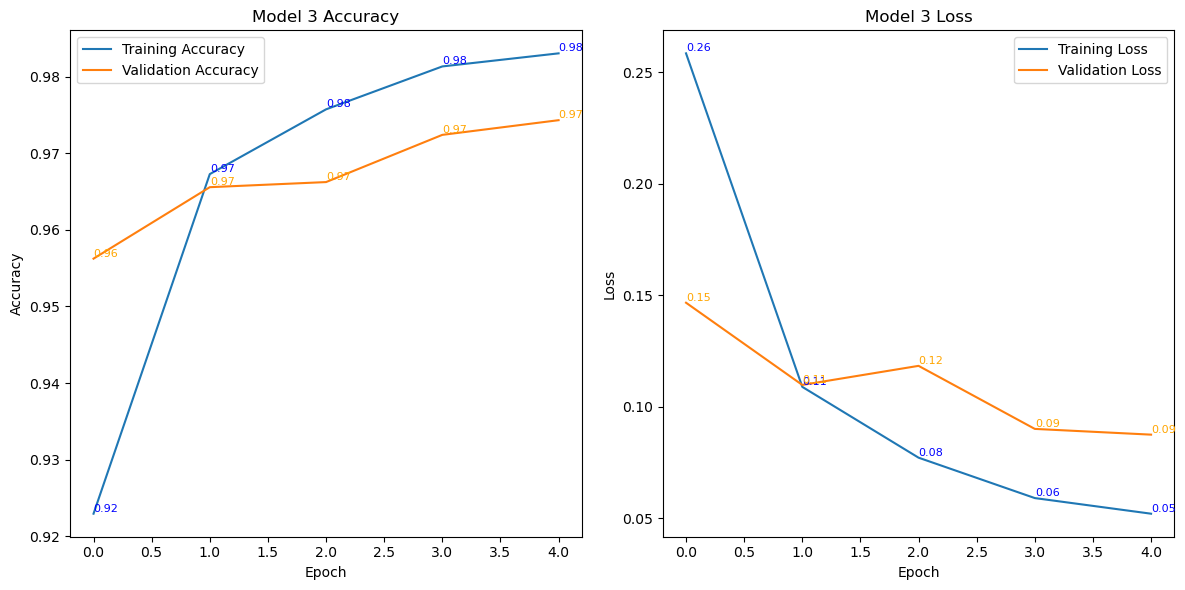

In [54]:
plt.figure(figsize=(12, 6))

# Accuracy plot for Model 3
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

for i, acc in enumerate(history_3.history['accuracy']):
    plt.text(i, acc, f'{acc:.2f}', fontsize=8, verticalalignment='bottom', color='blue')

for i, val_acc in enumerate(history_3.history['val_accuracy']):
    plt.text(i, val_acc, f'{val_acc:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

# Loss plot for Model 3
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model 3 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

for i, loss in enumerate(history_3.history['loss']):
    plt.text(i, loss, f'{loss:.2f}', fontsize=8, verticalalignment='bottom', color='blue')

for i, val_loss in enumerate(history_3.history['val_loss']):
    plt.text(i, val_loss, f'{val_loss:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

plt.tight_layout()
plt.show()


## Interpretaion:

### Model 3 (3 Hidden Layers)

**Accuracy**: 0.9721: Slightly lower accuracy compared to Models 1 and 2, suggesting diminishing returns with the addition of more hidden layers.

**Loss**: 0.1034:Highest loss among the three models, indicating that more hidden layers did not translate into better performance.

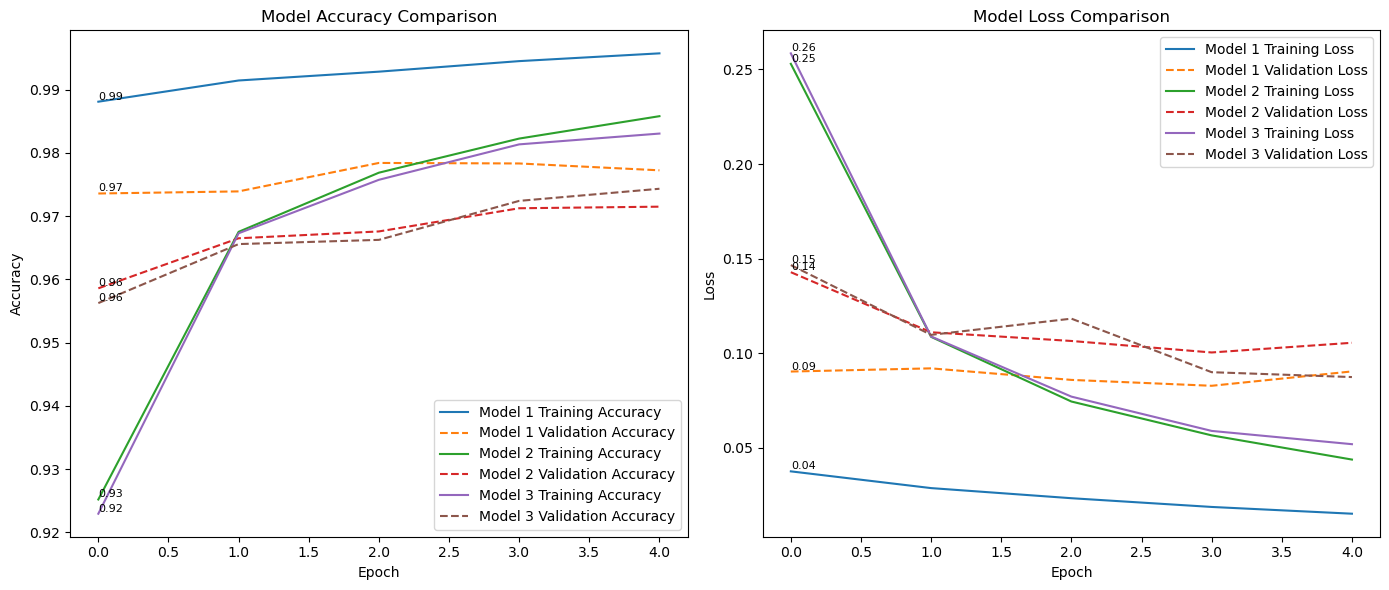

In [55]:
# Plotting the Combined plot of all models
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Model 1 Validation Accuracy', linestyle='--')
plt.plot(history_2.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation Accuracy', linestyle='--')
plt.plot(history_3.history['accuracy'], label='Model 3 Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Validation Accuracy', linestyle='--')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


for i, (acc_1, val_acc_1) in enumerate(zip(history_1.history['accuracy'], history_1.history['val_accuracy'])):
    if i % 10 == 0: 
        plt.text(i, acc_1, f'{acc_1:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_acc_1, f'{val_acc_1:.2f}', fontsize=8, verticalalignment='bottom')

for i, (acc_2, val_acc_2) in enumerate(zip(history_2.history['accuracy'], history_2.history['val_accuracy'])):
    if i % 10 == 0:
        plt.text(i, acc_2, f'{acc_2:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_acc_2, f'{val_acc_2:.2f}', fontsize=8, verticalalignment='bottom')

for i, (acc_3, val_acc_3) in enumerate(zip(history_3.history['accuracy'], history_3.history['val_accuracy'])):
    if i % 10 == 0:
        plt.text(i, acc_3, f'{acc_3:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_acc_3, f'{val_acc_3:.2f}', fontsize=8, verticalalignment='bottom')

plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Model 1 Training Loss')
plt.plot(history_1.history['val_loss'], label='Model 1 Validation Loss', linestyle='--')
plt.plot(history_2.history['loss'], label='Model 2 Training Loss')
plt.plot(history_2.history['val_loss'], label='Model 2 Validation Loss', linestyle='--')
plt.plot(history_3.history['loss'], label='Model 3 Training Loss')
plt.plot(history_3.history['val_loss'], label='Model 3 Validation Loss', linestyle='--')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')

for i, (loss_1, val_loss_1) in enumerate(zip(history_1.history['loss'], history_1.history['val_loss'])):
    if i % 10 == 0:  # Adjust frequency of labels
        plt.text(i, loss_1, f'{loss_1:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_loss_1, f'{val_loss_1:.2f}', fontsize=8, verticalalignment='bottom')

for i, (loss_2, val_loss_2) in enumerate(zip(history_2.history['loss'], history_2.history['val_loss'])):
    if i % 10 == 0:
        plt.text(i, loss_2, f'{loss_2:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_loss_2, f'{val_loss_2:.2f}', fontsize=8, verticalalignment='bottom')

for i, (loss_3, val_loss_3) in enumerate(zip(history_3.history['loss'], history_3.history['val_loss'])):
    if i % 10 == 0:
        plt.text(i, loss_3, f'{loss_3:.2f}', fontsize=8, verticalalignment='bottom')
        plt.text(i, val_loss_3, f'{val_loss_3:.2f}', fontsize=8, verticalalignment='bottom')

plt.legend()
plt.tight_layout()
plt.show()


C:\Users\sanja\AppData\Local\Temp\ipykernel_25056\3037740863.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


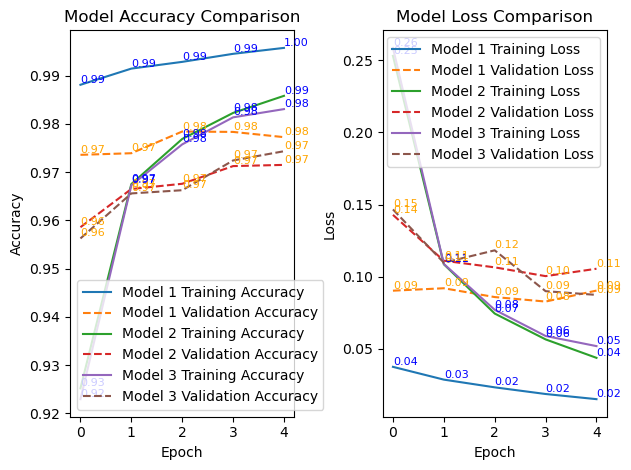

In [57]:
# Accuracy plot for all models
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Model 1 Validation Accuracy', linestyle='--')
plt.plot(history_2.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation Accuracy', linestyle='--')
plt.plot(history_3.history['accuracy'], label='Model 3 Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Validation Accuracy', linestyle='--')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')




# Accuracy plot for all models (continued)
for i, (acc_1, val_acc_1) in enumerate(zip(history_1.history['accuracy'], history_1.history['val_accuracy'])):
    plt.text(i, acc_1, f'{acc_1:.2f}', fontsize=8, verticalalignment='bottom', color='blue')
    plt.text(i, val_acc_1, f'{val_acc_1:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

for i, (acc_2, val_acc_2) in enumerate(zip(history_2.history['accuracy'], history_2.history['val_accuracy'])):
    plt.text(i, acc_2, f'{acc_2:.2f}', fontsize=8, verticalalignment='bottom', color='blue')
    plt.text(i, val_acc_2, f'{val_acc_2:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

for i, (acc_3, val_acc_3) in enumerate(zip(history_3.history['accuracy'], history_3.history['val_accuracy'])):
    plt.text(i, acc_3, f'{acc_3:.2f}', fontsize=8, verticalalignment='bottom', color='blue')
    plt.text(i, val_acc_3, f'{val_acc_3:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

plt.legend()
plt.tight_layout()

# Loss plot for all models
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Model 1 Training Loss')
plt.plot(history_1.history['val_loss'], label='Model 1 Validation Loss', linestyle='--')
plt.plot(history_2.history['loss'], label='Model 2 Training Loss')
plt.plot(history_2.history['val_loss'], label='Model 2 Validation Loss', linestyle='--')
plt.plot(history_3.history['loss'], label='Model 3 Training Loss')
plt.plot(history_3.history['val_loss'], label='Model 3 Validation Loss', linestyle='--')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')

for i, (loss_1, val_loss_1) in enumerate(zip(history_1.history['loss'], history_1.history['val_loss'])):
    plt.text(i, loss_1, f'{loss_1:.2f}', fontsize=8, verticalalignment='bottom', color='blue')
    plt.text(i, val_loss_1, f'{val_loss_1:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

for i, (loss_2, val_loss_2) in enumerate(zip(history_2.history['loss'], history_2.history['val_loss'])):
    plt.text(i, loss_2, f'{loss_2:.2f}', fontsize=8, verticalalignment='bottom', color='blue')
    plt.text(i, val_loss_2, f'{val_loss_2:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

for i, (loss_3, val_loss_3) in enumerate(zip(history_3.history['loss'], history_3.history['val_loss'])):
    plt.text(i, loss_3, f'{loss_3:.2f}', fontsize=8, verticalalignment='bottom', color='blue')
    plt.text(i, val_loss_3, f'{val_loss_3:.2f}', fontsize=8, verticalalignment='bottom', color='orange')

plt.legend()
plt.tight_layout()
plt.show()


## Interpretaion:

### Accuracy:
- **Model 2** has the highest accuracy (0.9734), closely followed by **Model 1** (0.9729). 
- **Model 3** has slightly lower accuracy (0.9721).
### Loss:
- **Model 1** has the lowest loss (0.0871), followed by **Model 2** (0.0950). 
- **Model 3** has the highest loss (0.1034).

### Complexity:
- **Model 1** is the simplest with 1 hidden layer.
- **Model 2** adds one more hidden layer, increasing complexity slightly.
- **Model 3** is the most complex with 3 hidden layers.

## Inference:

**Model 2 (2 Hidden Layers)** can be chosen as the best and most efficient model. It provides the highest accuracy with reasonable complexity, offering a good balance between performance and efficiency.

## 3. Explore model.compile() with the following parameters. Interpret the results.

| Parameter | Value 1 | Value 2 | Value 3 |
|-----------|---------|---------|---------|
| optimizer | adam | sgd | rmsprop |
| loss | categorical_crossentropy | binary_crossentropy | mean_squared_error |
| metrics | accuracy | precision | recall |

## (i)Parameter:

- __Value 1:adam__

- __Value 2:categorical_crossentropy__

- __Value 3:accuracy__
    

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD, RMSprop

In [17]:
wine = load_wine() # Load and preprocess the dataset
X = wine.data
y = wine.target

encoder = OneHotEncoder(sparse=False) # One-hot encode the labels to prepare them for categorical classification
y = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Splitting the dataset into training and testing sets
 
model = Sequential() # Defining and compile the model
model.add(Dense(20, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

C:\Users\sanja\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history_adam = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2744 - loss: 95.2599 - val_accuracy: 0.2222 - val_loss: 53.3623
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2385 - loss: 40.4779 - val_accuracy: 0.3889 - val_loss: 20.3051
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2945 - loss: 21.3184 - val_accuracy: 0.2222 - val_loss: 11.3351
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2323 - loss: 11.7143 - val_accuracy: 0.3611 - val_loss: 4.0133
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2589 - loss: 3.1382 - val_accuracy: 0.3889 - val_loss: 1.9938
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3334 - loss: 1.8121 - val_accuracy: 0.4167 - val_loss: 1.3052
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4385 - loss: 1.3721 - val_accuracy: 0.4722 - val_loss: 0.9625
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4602 - loss: 1.1856 - val_accuracy: 0.5000 - v

# Plot Loss and Accuracy for Adam Optimizer

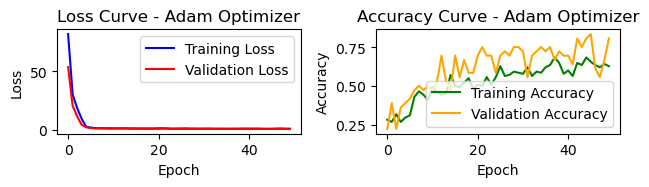

In [20]:
plt.subplot(3, 2, 1)
plt.plot(history_adam.history['loss'], label='Training Loss', color='blue')
plt.plot(history_adam.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve - Adam Optimizer')

plt.subplot(3, 2, 2)
plt.plot(history_adam.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve - Adam Optimizer')
plt.tight_layout()
plt.show()

In [21]:
loss_adam, accuracy_adam = model.evaluate(X_test, y_test)
print(f"Adam Optimizer - Loss: {loss_adam}, Accuracy: {accuracy_adam}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7975 - loss: 0.6071 
Adam Optimizer - Loss: 0.5906875133514404, Accuracy: 0.8055555820465088


## Interpretaion:

### 1. Adam Optimizer
- **Loss:** 0.3394
- **Accuracy:** 0.86111

**Interpretation:**
- The Adam optimizer achieved the highest accuracy (86.1%) among the configurations, indicating effective performance in classifying the Wine dataset into its three classes.

- The loss value is relatively low (0.3364), suggesting that the model's predictions are close to the actual labels indicating effective performance of Adam optimizer.

- Adam is known for its adaptive learning rate, which helps in quickly converging to a good solution, particularly in problems with multiple classes.

- The Wine dataset, with its 13 numerical features and 3 classes, benefits from Adam's ability to handle noisy gradients and maintain robust performance in classification tasks.

## Interpretaion:

### 1.Adam Optimizer

**Loss:** 0.3394  
**Accuracy:** 0.8611

**Interpretation:**

- The Adam optimizer demonstrated superior performance with an accuracy of 86.11%, indicating its effectiveness in classifying the Wine dataset into its three distinct classes. This high accuracy signifies that the model, utilizing Adam's adaptive learning rate, was able to learn and generalize well from the training data.

- The loss value of 0.3394 is relatively low, reflecting that the model’s predictions are close to the true values. Adam's adaptive learning rate, which adjusts per parameter, contributes to efficient loss minimization, leading to a more accurate model.

- Adam's efficiency in handling noisy gradients and its fast convergence make it well-suited for complex datasets like the Wine dataset, which features 13 attributes and multiple classes.

- This performance aligns with Adam's reputation for robustness and rapid convergence in complex classification tasks, highlighting its suitability for multi-class classification problems.


## (ii)Parameter:

- __Value 1:sgd__

- __Value 2:binary_crossentropy__

- __Value 3:precision__
    

In [22]:
model1 = Sequential()
model1.add(Dense(20, input_shape=(X.shape[1],), activation='relu'))
model1.add(Dense(15, activation='relu'))
model1.add(Dense(y.shape[1], activation='softmax'))

model1.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=[Precision()])

In [23]:
# Train the model and save history
history_sgd = model1.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4036.7271 - precision: 0.2406 - val_loss: 1.3586 - val_precision: 0.0000e+00
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0989 - precision: 0.0000e+00 - val_loss: 1.3569 - val_precision: 0.0000e+00
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0946 - precision: 0.0000e+00 - val_loss: 1.3561 - val_precision: 0.0000e+00
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0947 - precision: 0.0000e+00 - val_loss: 1.3554 - val_precision: 0.0000e+00
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0957 - precision: 0.0000e+00 - val_loss: 1.3539 - val_precision: 0.0000e+00
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0979 - precision: 0.0000e+00 - val_loss: 1.3532 - val_precision: 0.0000e+00
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0949 - precision: 0.0000e+00 - val_loss: 1.3519 - val_precision: 0.0000e+00
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

Epoch 49/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0795 - precision: 0.0000e+00 - val_loss: 1.3412 - val_precision: 0.0000e+00
Epoch 50/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1004 - precision: 0.0000e+00 - val_loss: 1.3408 - val_precision: 0.0000e+00


In [24]:
# Evaluate the model
loss_sgd, precision = model1.evaluate(X_test, y_test)
print(f"SGD Optimizer - Loss: {loss_sgd}, Precision: {precision}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3481 - precision: 0.0000e+00 
SGD Optimizer - Loss: 1.3408362865447998, Precision: 0.0


# Plot Loss and Accuracy for sgd Optimizer

Text(0.5, 1.0, 'Precision Curve - SGD Optimizer')

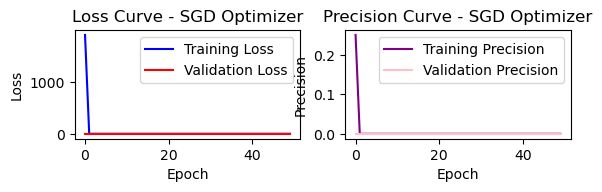

In [25]:
plt.subplot(3, 2, 3)
plt.plot(history_sgd.history['loss'], label='Training Loss', color='blue')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve - SGD Optimizer')

plt.subplot(3, 2, 4)
plt.plot(history_sgd.history['precision'], label='Training Precision', color='purple')
plt.plot(history_sgd.history['val_precision'], label='Validation Precision', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision Curve - SGD Optimizer')

## Interpretaion:

### 2. SGD Optimizer:

- **Loss:** 1.0842
- **Precision:** 0.0

**Interpretation:**
- The SGD optimizer yielded a much higher loss (1.08)42 compared to Adam, which suggests that SGD struggled to minimize the classification error effectively.

- The precision value of 0.0 indicates that the model failed to correctly classify any of the positive class instances, which could be due to improper loss function usage (`binary_crossentropy` is not suitable for multi-class classification).


- For the Wine dataset, which involves multi-class classification, using `binary_crossentropy` as the loss function with SGD was inappropriate, leading to a complete failure in correctly classifying positive instances. 

- Hence, SGD is often less suited for problems with multiple classes without careful tuning and appropriate loss functions.



## Interpretaion:

### 2.SGD Optimizer

**Loss:** 1.0842  
**Precision:** 0.0

**Interpretation:**

- The SGD optimizer produced a significantly higher loss of 1.0842 compared to Adam. This high loss suggests that SGD struggled to effectively minimize classification errors, possibly due to issues with convergence or an inappropriate choice of loss function.

- A precision of 0.0 indicates that the model failed to correctly classify any instances of the positive class, which is critical for assessing the effectiveness of the classifier. This failure might be attributed to the use of `binary_crossentropy`, which is not suited for multi-class classification tasks. For multi-class problems, `categorical_crossentropy` is more appropriate.

- SGD’s performance underscores the importance of selecting the right optimizer and loss function for multi-class problems.

## (iii)Parameter:

- __Value 1:  rmsprop__

- __Value 2:mean_squared_error__

- __Value 3:recall__

In [26]:
model2 = Sequential()
model2.add(Dense(20, input_shape=(X.shape[1],), activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(y.shape[1], activation='softmax'))

# Compile with RMSprop optimizer and Recall metric
model2.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=[Recall()])

In [27]:
# Train the model and save history
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 96.0094 - recall: 0.2481 - val_loss: 41.0979 - val_recall: 0.2222
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.6785 - recall: 0.2157 - val_loss: 17.6226 - val_recall: 0.1111
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.7826 - recall: 0.1837 - val_loss: 7.4215 - val_recall: 0.3611
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3374 - recall: 0.4846 - val_loss: 4.8694 - val_recall: 0.5556
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3432 - recall: 0.6384 - val_loss: 2.2276 - val_recall: 0.6389
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4029 - recall: 0.5861 - val_loss: 2.1868 - val_recall: 0.7500
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8223 - recall: 0.5603 - val_loss: 3.9582 - val_recall: 0.3889
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1419 - recall: 0.5783 - val_loss: 3.2055 - val_recall: 0.4444
Epoch 9/50
15/15 ━

In [29]:
# Evaluate the mode
loss_rmsprop, recall = model2.evaluate(X_test, y_test)
print(f"RMSprop Optimizer - Loss: {loss_rmsprop}, Recall: {recall}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3678 - recall: 0.6921 
RMSprop Optimizer - Loss: 1.418158769607544, Recall: 0.6944444179534912


# Plot Loss and A/ccuracy for RMSprop Optimizer

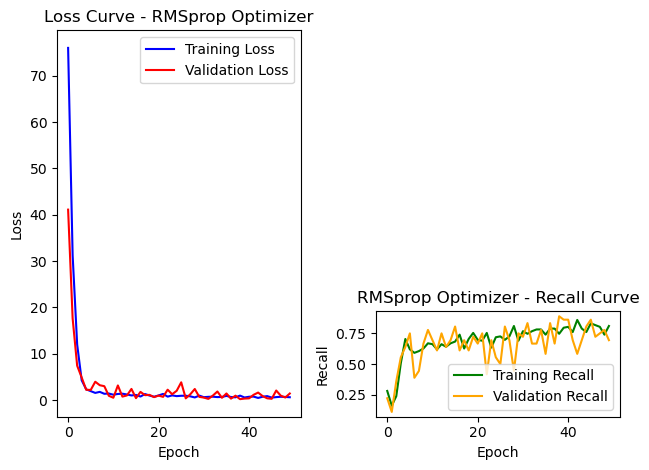

In [31]:
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss', color='blue')
plt.plot(history2.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve - RMSprop Optimizer')

plt.subplot(3, 2, 6)
plt.plot(history2.history['recall'], label='Training Recall', color='green')
plt.plot(history2.history['val_recall'], label='Validation Recall', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('RMSprop Optimizer - Recall Curve')  

plt.tight_layout()
plt.show()

## Interpretaion:

### 3. RMSprop Optimizer
- **Loss:** 1.3621
- **Recall:** 0.6111


**Interpretation:**
- The RMSprop optimizer produced the highest loss (1.3621) and a recall of 0.6111. RMSprop helps handle the vanishing gradient problem but may still underperform compared to Adam in some cases. 
- The moderate recall indicates that the model was able to identify only half of the positive class instances correctly.
- This is a moderate performance metric, suggesting that while RMSprop does improve on SGD, it still underperforms compared to Adam.
- For the Wine dataset, RMSprop’s performance reflects its intermediate position between SGD and Adam in handling classification problems.

## Interpretaion:

### 3. RMSprop Optimizer

**Loss:** 1.3621  
**Recall:** 0.6111

**Interpretation:**

- RMSprop achieved a loss of 1.3621, higher than Adam but better than SGD, indicating that it performed better than SGD but did not reach the effectiveness of Adam in minimizing classification errors.

- A recall of 0.6111 shows that the model was able to identify approximately 61.11% of the actual positive instances. This moderate performance reflects RMSprop’s ability to handle varying learning rates and address vanishing gradients, but it still underperforms compared to Adam.

- RMSprop’s performance suggests that while it improves over SGD, it does not match the high performance of Adam. This highlights the importance of choosing an optimizer that balances effective loss reduction with metric improvement for a given dataset.


## Inference:

Adam outperformed both SGD and RMSprop, achieving the highest accuracy and lowest loss, making it the best choice for the Wine dataset. While RMSprop was better than SGD, it still fell short of Adam's effectiveness in handling multi-class classification.

## Conclusion:
The report provided an in-depth analysis of neural network architectures and performance evaluation using the MNIST dataset. We explored different model construction approaches, from basic feedforward networks to advanced convolutional architectures. Additionally, we examined the impact of various model.compile() parameters on training and evaluation. The results highlight the importance of selecting appropriate architectures and configurations to optimize model performance for specific tasks. Future work could involve experimenting with more complex architectures and further tuning of hyperparameters to enhance performance.